# **Домашнее задание к занятию «Классификация: Логистическая регрессия и SVM»**


В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.
Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.
Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv


In [33]:
df = pd.read_csv('adult.csv')

Проводим первычный анализ данных

In [34]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [35]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [36]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [7]:
#df = df.drop(df[df['occupation']=='?'].index)

Видим, что есть пропущенные данные, обозначенные знаком "?"

Определяем в каких столбцах присутствует "?" и сколько этих значений

In [40]:
(df=="?").sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

В столбцах workclass, occupation и native-country присутствуют пропущенные значений 

 Заполним "?" значением "Private", начнем с workclass

In [41]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Видим, что подавляющее большинство значений является Private, поэтому заменим знак "?" на Private

In [9]:
df.workclass.replace("?", "Private", inplace=True)

Проверяем, что знак вопроса исчез, а количество значений Private увеличилось на соответствующую величину

In [10]:
df.workclass.value_counts()

Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
#df = df.drop(df[df['native-country']=='?' ].index)

Аналогично с occupation

In [12]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

В данном случае не получится приплюсовать пропущенные значения Occupation к какому-либо подавляющему большинству, поэтому заменяем его на Other

In [13]:
df.occupation.replace("?", "Other", inplace=True)

In [14]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Other                2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

И так же рассматриваем native-country

In [15]:
df["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Соединенных Штатов подавляющее большинство и если прибавить к ним 857 пропущенных значений, то это мало на что повлияет, так и делаем

In [16]:
df['native-country'].replace('?', 'United-States', inplace=True)

In [17]:
df["native-country"].value_counts()

United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [18]:
#df['workclass'].unique()

In [19]:
#df[df['workclass'].isin(['?'])]

Смотрим насколько сильно коррелируют данные друг с другом, по графику видим, что вроде бы сильных корреляций нет

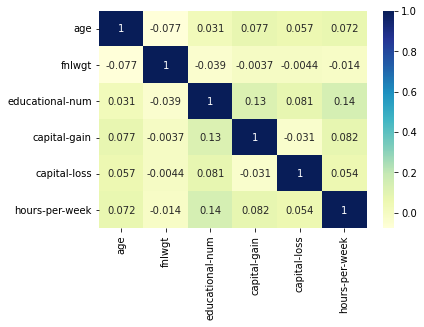

In [20]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Проверяем есть ли зависимость между возрастом и зарплатой

Text(0.5, 1.0, 'age distribution over salary')

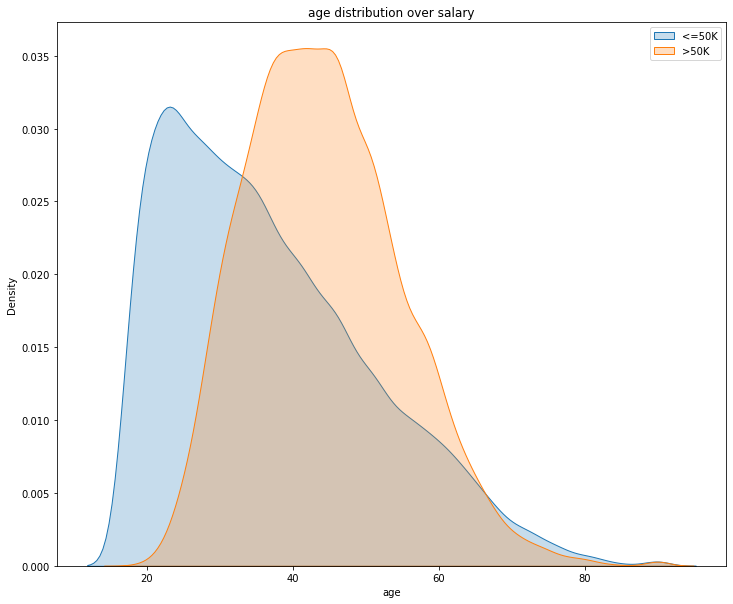

In [21]:
plt.figure(figsize=(12,10))
sns.kdeplot(df[df["income"]=="<=50K"].age, shade=True)
sns.kdeplot(df[df["income"]==">50K"].age, shade=True)
plt.legend(["<=50K",">50K"])
plt.title("age distribution over salary")

Видим, что средний возраст людей с более высокой зарплатой примерно 40 лет. А с более низкой - чуть больше 20-ти.

Преобразовываем данные для обучения модели

In [22]:
selectedColumns = df [['income', 'age', 'workclass', 'education', 'gender', 'marital-status', 'occupation', 'relationship', 'race', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

In [23]:
X = pd.get_dummies( selectedColumns, columns = ['workclass', 'marital-status','education', 'gender', 'occupation', 'relationship', 'race', 'native-country'])

In [24]:
X.head(5)

,income,age,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,<=50K,25,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,<=50K,38,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,>50K,28,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,>50K,44,7688,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,<=50K,18,0,0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
del X['income']
X.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,0,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,0,0,50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,7688,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,0,0,30,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# целевая переменная (столбец income) является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
le.fit( df['income'] )

LabelEncoder()

In [28]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [29]:
le.transform( [ '<=50K', '>50K'] )

array([0, 1])

In [30]:
# записываем в переменную y преобразованный столбец income

y = pd.Series( data = le.transform( df['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

# **Логистическая регрессия**

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter = 1000))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #по условиям задания 80% выборки берем на обучение и 20% оставляем на проверку

In [49]:
#обучаем части датасета (train)
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [50]:
predictions = model.predict(X_test)

In [51]:
predictions[:20]

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
model.predict(X_test)

array([0, 0, 1, ..., 1, 0, 1])

In [62]:
model.predict_proba(X_test)

array([[0.98588183, 0.01411817],
       [0.89562044, 0.10437956],
       [0.06564489, 0.93435511],
       ...,
       [0.42224894, 0.57775106],
       [0.99741759, 0.00258241],
       [0.26819685, 0.73180315]])

Точность предсказания на обучающей и тестовых выборках

In [63]:
model.score(X_train, y_train)

0.8517902387838149

In [64]:
model.score(X_test, y_test)

0.8554611526256526

И на train, и на test получили практически одинаковое качество предсказаний, значит модель логистической регрессии работает хорошо

# **SVM**

In [56]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [57]:
clf.score(X_train, y_train)

0.8609781690681545

In [58]:
clf.score(X_test, y_test)

0.8544375063977889

Аналогично с логичтической регрессией метод опорных векторов дал хорошие результаты, думаю, что в обеих вариантах применения регрессии модели справились с поставленной задачей

Что касается улучшения результата - сначала я просто удалил все данные, в которых был знак "?" и получил тоже хорошие результаты. Но потом я отказался от удаления и заменил знаки "?" либо данными, превалирующими в столбце, либо (если данные примерно равномерно распределены в столбце) заменил на "Other". Результат получился на одну сотую лучше - проверял несколько раз :)
Возможно если выборка измеряется не десятками тысяч записей, а на порядок больше, то результат был бы еще лучше.